In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return np.sin(x)
    
def dfunc(x):
    return np.cos(x)

def paramshift(func, x, r, phi):
    return r*(func(x + phi) - func(x - phi))

nr = 1000
ns = 1000
rs = np.linspace(-100,100, nr)
ss = np.linspace(-10,10, ns)
min_error, gmin_error, min_r, min_phase = 10000000, 0, 0, 0
fidelity = []
errors = np.ones((nr, ns))
for i in range(0, nr):
    for j in range(0, ns):
        x = np.pi*3.2
        gradient = dfunc(x)
        psuedogradient = paramshift(func, x, rs[i], ss[j])
        error = np.abs(gradient - psuedogradient)
        errors[i, j] = error
        if error < min_error: 
            min_error = error
            gmin_error = gradient
            min_r = rs[i]
            min_phase = ss[j]



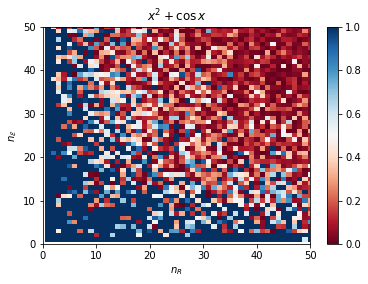

In [83]:

fig, ax = plt.subplots()

c = ax.pcolormesh(nrs, nss, min_fidilities, cmap='RdBu', vmin=0, vmax=1)
ax.set_title('$x^2 + \cos x $')
# set the limits of the plot to the limits of the data
ax.axis([np.min(nrs), np.max(nrs), np.min(nss),np.max(nss)])
plt.xlabel('$n_R$')
plt.ylabel('$n_{\mathcal{E}}$')
plt.xticks(range(0, 51, 10))
plt.yticks(range(0, 51, 10))
fig.colorbar(c, ax=ax)
plt.savefig('share.eps', format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


49.94994994994997
0.010010010010010006
1.4321180547893775e-05
0.0002010234148051361


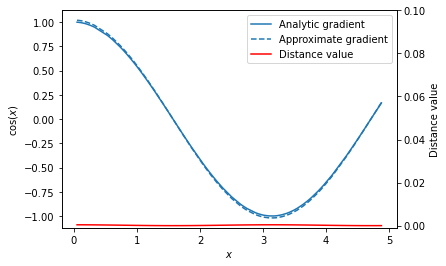

In [2]:
ae = []
re = []
reals = []
fakes = []
xs = np.random.uniform(low = 0, high = 5, size = (100))
xs.sort()

for i in range(0, 100):
    x = xs[i]
    reals.append(dfunc(x))
    fakes.append(paramshift(func, x, min_r + 1, min_phase))
    re.append(np.abs(dfunc(x)-paramshift(func, x, min_r + 1, min_phase))**2)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(xs, reals, color = '#1f77b4', label="Analytic gradient")
ax1.plot(xs, fakes, color = '#1f77b4', linestyle = 'dashed', label="Approximate gradient")
ax2.plot(xs, re, color = 'red', label = "Distance value")

ax1.set_xlabel('$x$')
ax1.set_ylabel('$\cos(x)$')
ax2.set_ylabel('Distance value')
ax2.set_ylim(-0.001, 0.1)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=1)
plt.savefig('sinx1.eps', format = 'eps', dpi = 1000)
print(min_r)
print(min_phase)
print(min_error)
print(np.average(re))


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return np.log(x)



def dfunc(x):
    return 1/x

def paramshift(func, x, r, phi):
    return r*(func(x + phi) - func(x - phi))

nr = 1000
ns = 1000
rs = np.linspace(-100,100, nr)
ss = np.linspace(-100,100, ns)
min_error, gmin_error, min_r, min_phase = 10000000, 0, 0, 0
fidelity = []
errors = np.ones((nr, ns))
for i in range(0, nr):
    for j in range(0, ns):
        x = np.random.uniform(0.1,2*np.pi)
        gradient = dfunc(x)
        psuedogradient = paramshift(func, x, rs[i], ss[j])
        error = np.abs(gradient - psuedogradient)
        errors[i, j] = error
        if error < min_error: 
            min_error = error
            gmin_error = gradient
            min_r = rs[i]
            min_phase = ss[j]



C:\Users\haime\AppData\Local\Temp\ipykernel_12140\1724270566.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(x)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-0.7007007007006933
-0.7007007007006933
0.0011131214963345792
0.0013194029458170457


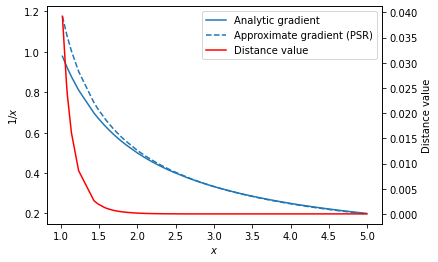

In [8]:
ae = []
re = []
reals = []
fakes = []
xs = np.random.uniform(low = 1, high = 5, size = (100))
xs.sort()
for i in range(0, 100):
    x = xs[i]
    reals.append(dfunc(x))
    fakes.append(paramshift(func, x, min_r, min_phase))
    re.append(np.abs(dfunc(x)-paramshift(func, x, min_r, min_phase))**2)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(xs, reals, color = '#1f77b4', label="Analytic gradient")
ax1.plot(xs, fakes, color = '#1f77b4', linestyle = 'dashed', label="Approximate gradient (PSR)")
ax2.plot(xs, re, color = 'red', label = "Distance value")

ax1.set_xlabel('$x$')
ax1.set_ylabel('$1/x$')
ax2.set_ylabel('Distance value')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=1)
plt.savefig('lnx.eps', format = 'eps', dpi = 1000)
print(min_r)
print(min_phase)
print(min_error)
print(np.average(re))
